### Handling null entries

In [2]:
import numpy as np
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('clean_df.csv')


In [6]:
np.sum(df.isnull().any(axis=1))

2815

In [9]:
df.iloc[df[df.isnull().any(axis=1)].index,:].head()

,Unnamed: 0,text,target
208,208,NaN,0
249,249,NaN,0
398,398,NaN,0
430,430,NaN,0
1011,1011,NaN,0


Well, some unnecessary data must have been lost while cleaning like urls. 

Only 2815 empty records out of 1.6 billion..not that significant change so i am just gonna drop those records.

In [11]:
df.dropna(inplace=True)
df = df.iloc[: , 1:]
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597185 entries, 0 to 1597184
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1597185 non-null  object
 1   target  1597185 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


### Word Cloud( quick & dirty way of text analysis )

Let's see what words are more frequent

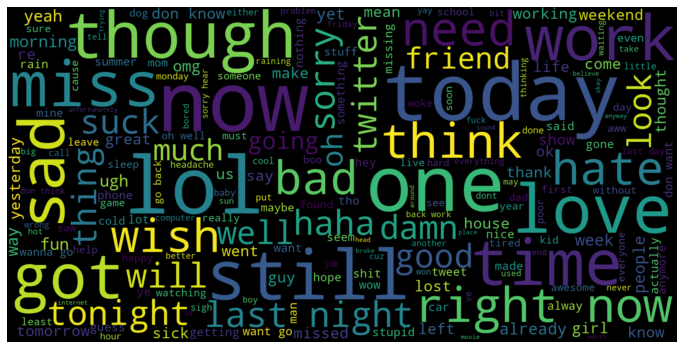

In [12]:
neg_tweets = df[df.target==0]
pos_tweets = df[df.target==4]
pos=list(pos_tweets.text)
pos = pd.Series(pos).str.cat(sep=' ')
neg=list(neg_tweets.text)
neg = pd.Series(neg).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Words like , "love", "today", "one",etc are more frequent words.I see some negative words like, "Sad", "hate", "miss", "ugh", and how can we forget "work"😂.

"Love"? what's it doing in negative tweets. Well i guess the context it's used in is negative or sarcastic. Let's check.

In [13]:
for i in neg_tweets.text[:150]:
    if 'love' in i:
        print(i)

ahh ive always wanted to see rent love the soundtrack !!
meh ... almost lover is the exception ... this track gets me depressed every time .
awe i love you too !!!! 1 am here i miss you
damn ! the grind is inspirational and saddening at the same time . don ' t want you to stop cuz i like what u do ! much love
i ' m missing you babe .. but as long as your alive i ' m happy .. ya i ' m tired my love imma try to sleep hopefully you had a headstart


Well there are mixed emotions and i think it's right that they classify as negative tweets

Let's have a look at Positive tweet wordcloud

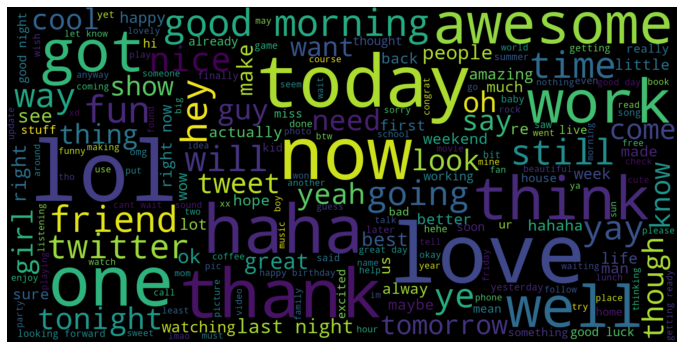

In [14]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Looks good! 
Again "Today" is more highlighted..

### Count vectorizer 
Calculates term frequency.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cvec = CountVectorizer()
cvec.fit(df.text)

CountVectorizer()

In [17]:
len(cvec.get_feature_names())

285398

In [19]:
neg_doc_matrix = cvec.transform(df[df.target == 0].text)
pos_doc_matrix = cvec.transform(df[df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()


you can directly get the term frequency from the sparse matrix. 

In [40]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313130,0,313130
the,257797,0,257797
my,190748,0,190748
it,157165,0,157165
and,153951,0,153951
is,128004,0,128004
in,115433,0,115433
you,103790,0,103790
for,98978,0,98978
of,92716,0,92716


So the term frequency dataframe is created!!